# Assignment 4
**Group 5**

Group members:
- Moqian Chen (r0965473)
- Laurens Dergent (r0794288)
- Sarah Guilliams (r0751825)
- Yeabsera Kinfu (r0930148)
- Jorge Puertolas Molina (r0978889)
- Isabel Scholz (r1008561)

Link to the GitHub repository: https://github.com/LaurensDergent/DataAnalytics.git 

Important to remember: 

You are free to explore anything you deem interesting and present your findings in your report. The
main goal is to get familiar with Cypher but also to hone your "storytelling" skills. In that sense, try to
focus on a single or a few hypotheses or findings you explore in full (with nicely formatted visualizations)
and explaining what it says instead of just going for quick filter saying: "here are the three nodes with
the most connections" (boring) or showing a graph hairball.


Pick something you want to explore and try to work this out in full.
You will realize that the data set is likely too large to look at everything at once, so a guided “deep dive”
will work better. Also, obviously most of the messages will be in Dutch or French, but that should not be
too much of a burden to do something interesting.

## Hypothesis: 
- far left and far right have more interaction + relatively more active engagement (think retweet, requote)
- central parties verly little engagement because older population not very present on twitter
- newspapers are illustrating the following relation between the parties. Can we also see it in their twitter usage (source: https://www.gva.be/cnt/dmf20240521_91914270 and https://www.nieuwsblad.be/cnt/dmf20240521_96158280 )

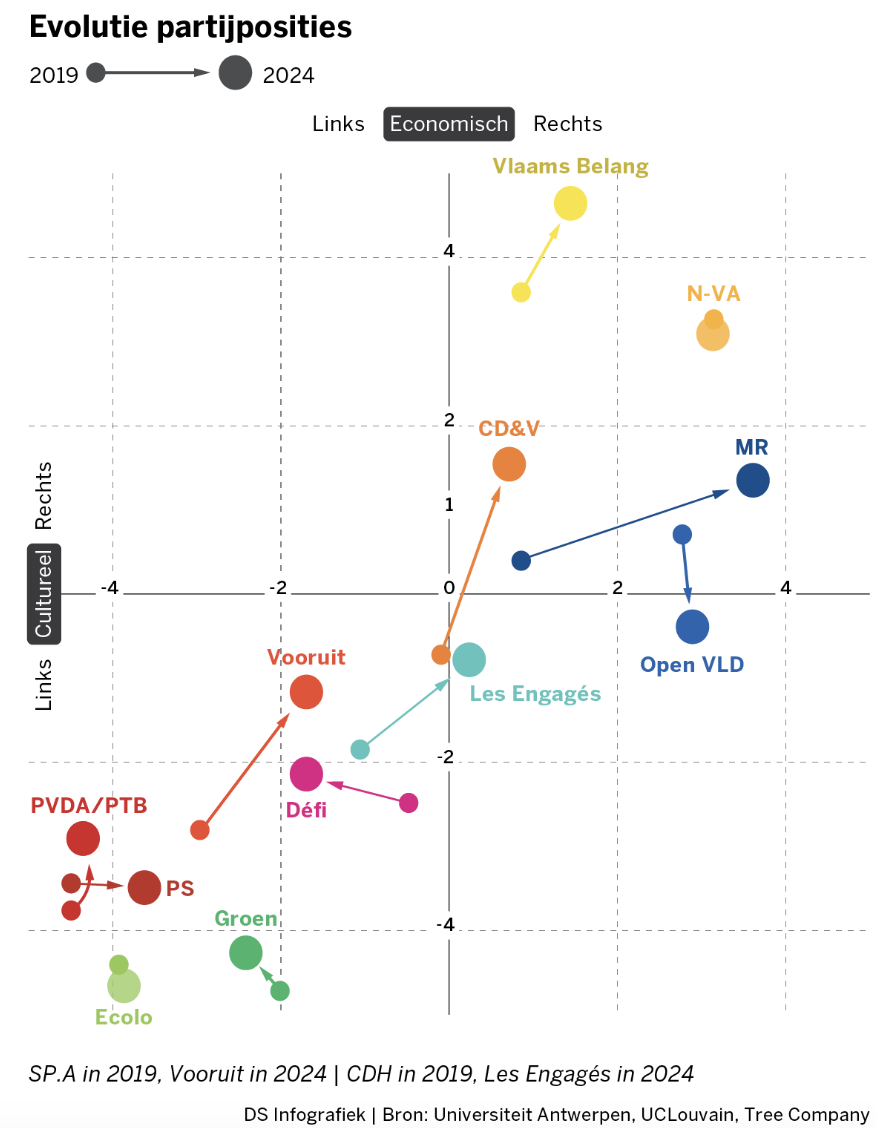

In [39]:
from IPython.display import Image

# Display the image
Image(filename='Political_Parties_Belgium.png')

In [1]:
#Load packages
import pandas as pd
import numpy as np
import networkx as nx
import itertools

In [2]:
#file_location = "memgraph-query-results-export.graphml"
file_location = "/Users/sarahguilliams/Desktop/Advanced Analytics in a Big Data World/Assignment 4/memgraph-query-results-export.graphml"
graph = nx.read_graphml(file_location)

## Pre-processing

Add the party of the politician. This can be used in Gephi to identify politicians vs normal twitter users

In [3]:
# Iterate through the edges
# Iterate through the edges
for source, target, edge_data in graph.edges(data=True):
    # Check if the edge represents membership
    if edge_data.get("edge_type") == "MEMBER_OF":
        # Get the party name from the source node
        party_node_data = graph.nodes.get(target)
        #print(party_node_data)
        if party_node_data:
            party_name = party_node_data.get("Party_label", None)
            if party_name:
                # Assign the party name as a new attribute to the source node
                graph.nodes[source]["Party_name"] = party_name


As an illustration, this is the type of nodes and edges that we are working with

In [49]:

# Print the first 2 nodes
print("First 2 nodes:")
count_nodes = 0
for node in graph.nodes(data=True):
    print(node)
    count_nodes += 1
    if count_nodes >= 2:
        break  # Break after printing the first 50 nodes

# Print the first 10 edges
print("First 2 edges:")
count_edges = 0
for edge in graph.edges(data=True):
    print(edge)
    count_edges += 1
    if count_edges >= 2:
        break  # Break after printing the first 50 edges

First 2 nodes:
('469337', {'ident': 'N-VA', 'label': 'N-VA', 'node_type': 'Party', 'Party_label': 'N-VA'})
('4689', {'created_at': '2024-02-07T16:11:12+00:00', 'favorite_count': 294, 'full_text': '#Vreemd | Wat heeft Frank Vandenbroucke te verbergen?Vandenbroucke zou zélf (!) transparantie moeten geven over de #lobbyisten die hij ziet. Maar doet dit niet.Vandenbroucke zou zélf (!) maatregelen moeten nemen om de #integriteit op zijn kabinet te garanderen. Maar ook… https://t.co/AcMHd3s1Ip', 'has_birdwatch_notes': False, 'ident': '1755262946060497087', 'lang': 'nl', 'quote_count': 3, 'reply_count': 36, 'retweet_count': 54, 'views_count': 20095, 'label': '1755262946060497087', 'node_type': 'Tweet', 'Tweet_label': '1755262946060497087'})
First 2 edges:
('345388', '4689', {'edge_type': 'POSTED'})
('345388', '469337', {'edge_type': 'MEMBER_OF'})


Here is some code that is used to perform checks with:

In [5]:
# id to check edges
id="352012"

for source, target, edge_data in graph.edges(data=True):
    if source == id or target == id:
        # Print the edge information
        print(f"Edge: {source} -> {target}, Edge Data: {edge_data}")

Edge: 352012 -> 22921, Edge Data: {'edge_type': 'POSTED'}
Edge: 352012 -> 59080, Edge Data: {'edge_type': 'POSTED'}
Edge: 352012 -> 74352, Edge Data: {'edge_type': 'POSTED'}
Edge: 352012 -> 84851, Edge Data: {'edge_type': 'POSTED'}
Edge: 352012 -> 151306, Edge Data: {'edge_type': 'POSTED'}
Edge: 352012 -> 151592, Edge Data: {'edge_type': 'POSTED'}
Edge: 352012 -> 180273, Edge Data: {'edge_type': 'POSTED'}
Edge: 352012 -> 190000, Edge Data: {'edge_type': 'POSTED'}
Edge: 352012 -> 238706, Edge Data: {'edge_type': 'POSTED'}
Edge: 352012 -> 256345, Edge Data: {'edge_type': 'POSTED'}
Edge: 352012 -> 284371, Edge Data: {'edge_type': 'POSTED'}
Edge: 352012 -> 304871, Edge Data: {'edge_type': 'POSTED'}
Edge: 352012 -> 313392, Edge Data: {'edge_type': 'POSTED'}
Edge: 352012 -> 326285, Edge Data: {'edge_type': 'POSTED'}
Edge: 352012 -> 327218, Edge Data: {'edge_type': 'POSTED'}
Edge: 352012 -> 331077, Edge Data: {'edge_type': 'POSTED'}
Edge: 352012 -> 331082, Edge Data: {'edge_type': 'POSTED'}


In [6]:
# checks for the nodes
id = "23466"
node_data = graph.nodes[id]
print(f"Node ID: {id}, Node Data: {node_data}")

Node ID: 23466, Node Data: {'created_at': '2023-12-03T20:03:47+00:00', 'favorite_count': 1, 'full_text': '@ArnArn01 @PPrevot @MR_officiel @GLBouchez Les socialistes qui parlent 😂', 'has_birdwatch_notes': False, 'ident': '1731403879231750383', 'lang': 'fr', 'quote_count': 0, 'reply_count': 1, 'retweet_count': 0, 'views_count': 44, 'label': '1731403879231750383', 'node_type': 'Tweet', 'Tweet_label': '1731403879231750383'}


In [ ]:
# Define the path where you want to save the file
#file_path = "/Users/sarahguilliams/Desktop/Advanced Analytics in a Big Data World/Assignment 4/modified_graph_party_names.graphml"

# Save the modified graph in .graphml format
#nx.write_graphml(graph, file_path)


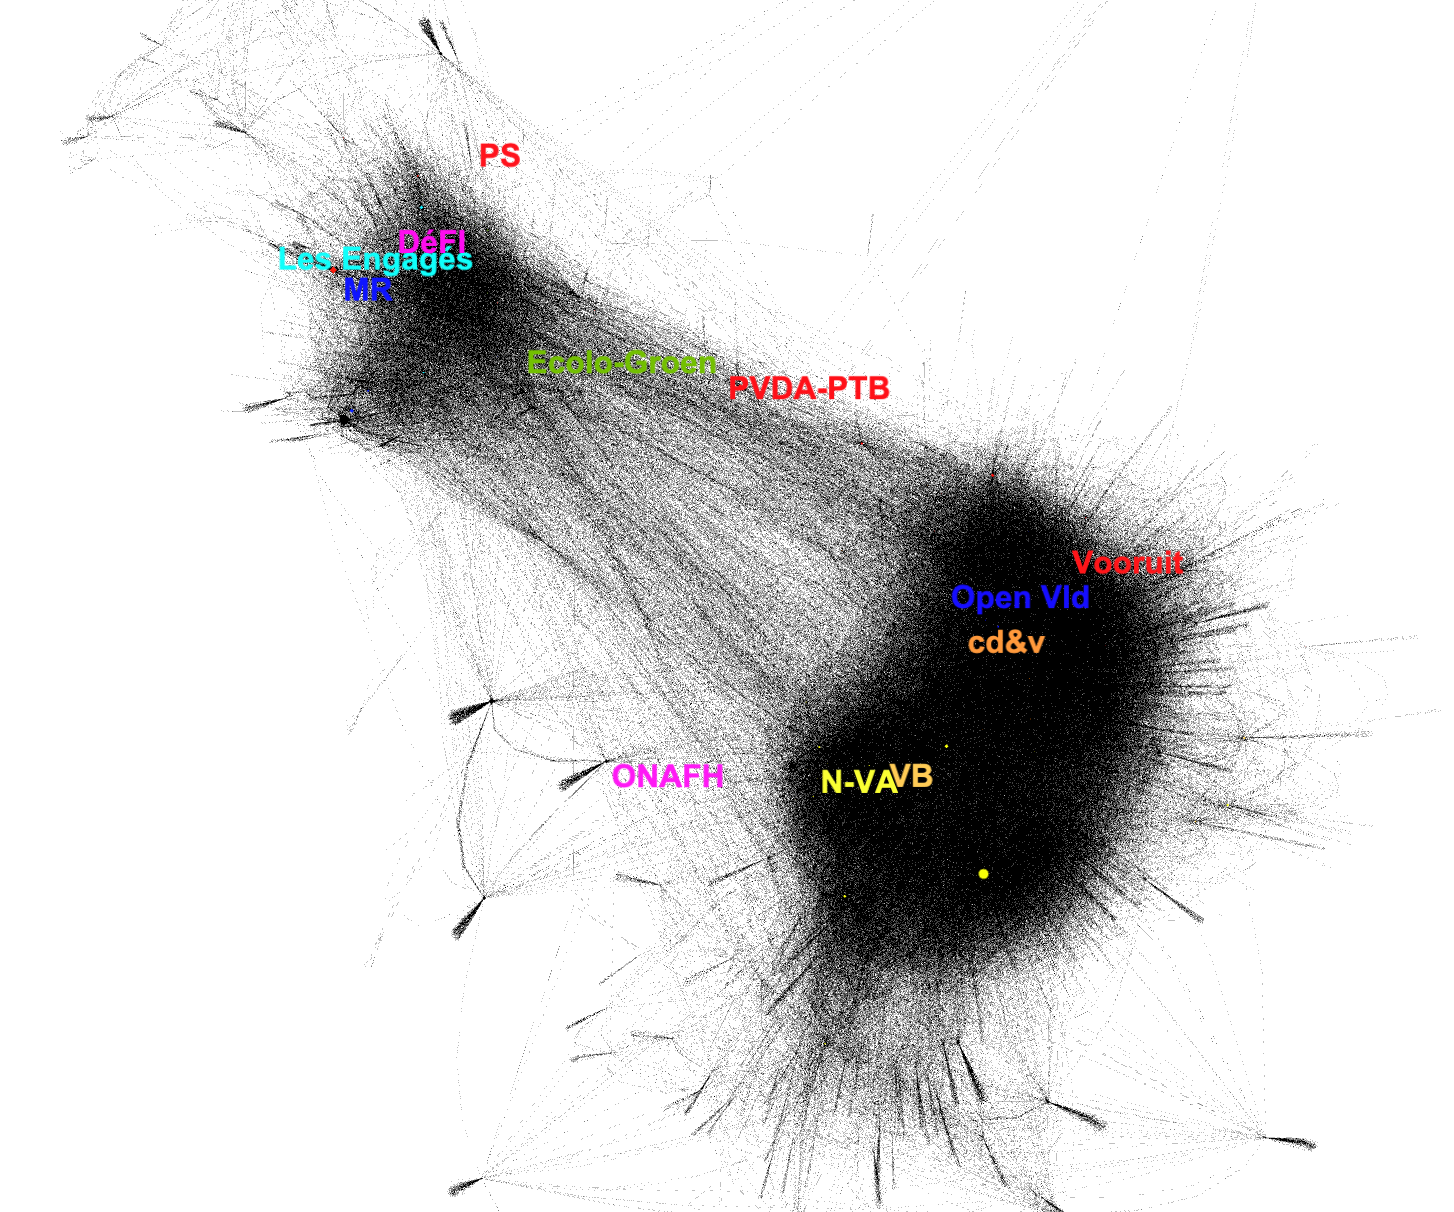

In [48]:
# Focus on the Flemish part
Image(filename='Graph pre data processing.png')

## Add a figure that shows the relationship between politician and twitter user with all the steps between. Then show a figure with the end goal, a direct relationship between the politician and the twitter user

Graph before:
- this is one big hairball.
- difficult to interpret because as figure shows, there are many different nodes between the politician and user.
- size of node politician also only depends on the number of tweets by the politician. Not on the direct interaction with this politician
- this is why it is important to clean the graph.

Now, try to skip the tweet node and look at the direct interactions between politicians and their twitter account vs the twitter account of someone that interacted with them.

From these checks, it becomes obvious that some tweets that the politican posted, are replies to their own tweets. 

In [7]:
# id to check edges
id = "338704" #A tweet posted by a politician, which is a reply to a tweet by a twitter user

for source, target, edge_data in graph.edges(data=True):
    if source == id or target == id:
        # Print the edge information
        print(f"Edge: {source} -> {target}, Edge Data: {edge_data}")

print("\nThe politician that posted the tweet:")
id = "358639"
node_data = graph.nodes[id]
print(f"Node ID: {id}, Node Data: {node_data}")

print("\nThe tweet in question:")
id = "338704"
node_data = graph.nodes[id]
print(f"Node ID: {id}, Node Data: {node_data}")

print("\n This is a reply to this tweet:")
id = "338674"
node_data = graph.nodes[id]
print(f"Node ID: {id}, Node Data: {node_data}")

# This is still an interaction that should be taken into consideration!!!

Edge: 358639 -> 338704, Edge Data: {'edge_type': 'POSTED'}
Edge: 338704 -> 338674, Edge Data: {'edge_type': 'REPLY_TO'}

The politician that posted the tweet:
Node ID: 358639, Node Data: {'created_at': '2011-09-02T06:45:44+00:00', 'description': 'Consultant en Aménagement Numérique des Territoires', 'favourites_count': 24502, 'followers_count': 431, 'friends_count': 510, 'ident': '366462579', 'is_blue_verified': False, 'listed_count': 6, 'location': 'Le Val Sait Germain', 'media_count': 59, 'name': 'Eric THIEBAUT', 'normal_followers_count': 431, 'possibly_sensitive': False, 'screen_name': 'ThiebautEric', 'statuses_count': 8281, 'verified': False, 'label': '366462579', 'node_type': 'User', 'User_label': '366462579', 'Party_name': 'PS'}

The tweet in question:
Node ID: 338704, Node Data: {'created_at': '2024-04-29T20:41:06+00:00', 'favorite_count': 4, 'full_text': '@Marc_Doyer @EmmanuelMacron @verity_france Attention @Marc_Doyer dire "vous comprenez le japonais" c\'est pas une menace ? 😂

New code:

In [45]:

graph2 = graph.copy()

# Create a list to store edges to remove
edges_to_remove = []
# Create a list to store edges to add
edges_to_add = []

edges = list(graph2.edges(data=True))

# Iterate over the edge list
for source, target, edge_data in edges:
    # Check if the edge represents a reply to a tweet
    if edge_data.get("edge_type") == "REPLY_TO" or edge_data.get("edge_type") == "QUOTE_OF":
        
        reply_tweet_source_id = source # Get the source tweet (i.e. the tweet posted by the user)
        reply_tweet_target_id = target # Get the target tweet (i.e. the tweet posted by the politician)
           
        # Search for edges that end at the reply_tweet node and have edge_type "POSTED"
        for u, v, e_data in graph2.in_edges(reply_tweet_source_id, data=True):
            if e_data.get("edge_type") == "POSTED":

                if 'Party_name' not in graph2.nodes[u]: # The user should not be a politician

                    user_account = u

                    # Add an edge between the user and the original tweet being replied to
                    edges_to_add.append((user_account, reply_tweet_target_id, "INTERACTED_W_TWEET"))
                    
                    # Add edges to remove
                    edges_to_remove.append((reply_tweet_source_id, reply_tweet_target_id))
                    edges_to_remove.append((user_account, reply_tweet_source_id))
                else: # because sometimes the politician replied to the tweet
                    for w, x, e_data2 in graph2.in_edges(reply_tweet_target_id, data=True):

                        if e_data2.get("edge_type") == "POSTED":

                            if 'Party_name' not in graph2.nodes[w]: # The user should not be a politician

                                user_account = w
                                # Add an edge between the user and the original tweet being replied to
                                edges_to_add.append((user_account, reply_tweet_source_id, "INTERACTED_W_TWEET"))
                                
                                # Add edges to remove
                                edges_to_remove.append((reply_tweet_source_id, reply_tweet_target_id))
                                edges_to_remove.append((user_account, reply_tweet_target_id))

# Add new edges
for u, v, edge_type in edges_to_add:
    graph2.add_edge(u, v, edge_type=edge_type)

# Remove edges
graph2.remove_edges_from(edges_to_remove)


Some nodes need to be removed if they have no edges anymore

In [46]:
nodes_to_remove = []

# Iterate over nodes in graph2
for node, node_data in graph2.nodes(data=True):
    # Check if the node has node_type 'Tweet' and no edges
    if node_data.get('node_type') == 'Tweet' and graph2.degree(node) == 0:
        # Add the node to the list of nodes to remove
        nodes_to_remove.append(node)

# Remove nodes with no edges from graph2
graph2.remove_nodes_from(nodes_to_remove)

## Checks to see if the code works well
### check 1: politician: should not have the new edge interacted_w_tweet

In [10]:
# id to check edges
id = "345384"

for source, target, edge_data in graph2.edges(data=True):
    if source == id or target == id:
        # Print the edge information
        print(f"Edge: {source} -> {target}, Edge Data: {edge_data}")

Edge: 345384 -> 4688, Edge Data: {'edge_type': 'POSTED'}
Edge: 345384 -> 25149, Edge Data: {'edge_type': 'POSTED'}
Edge: 345384 -> 469337, Edge Data: {'edge_type': 'MEMBER_OF'}
Edge: 345384 -> 25148, Edge Data: {'edge_type': 'POSTED'}
Edge: 345384 -> 25150, Edge Data: {'edge_type': 'POSTED'}
Edge: 345384 -> 25151, Edge Data: {'edge_type': 'POSTED'}
Edge: 345384 -> 25152, Edge Data: {'edge_type': 'POSTED'}
Edge: 345384 -> 25153, Edge Data: {'edge_type': 'POSTED'}
Edge: 345384 -> 25154, Edge Data: {'edge_type': 'POSTED'}
Edge: 345384 -> 25155, Edge Data: {'edge_type': 'POSTED'}
Edge: 345384 -> 25156, Edge Data: {'edge_type': 'POSTED'}
Edge: 345384 -> 25157, Edge Data: {'edge_type': 'POSTED'}
Edge: 345384 -> 25158, Edge Data: {'edge_type': 'POSTED'}
Edge: 345384 -> 25159, Edge Data: {'edge_type': 'POSTED'}
Edge: 345384 -> 25160, Edge Data: {'edge_type': 'POSTED'}
Edge: 345384 -> 70155, Edge Data: {'edge_type': 'POSTED'}
Edge: 345384 -> 70154, Edge Data: {'edge_type': 'POSTED'}
Edge: 34538

### Check one of the tweets by the politician. 

In [11]:
id="70155"

for source, target, edge_data in graph2.edges(data=True): 
    if source == id or target == id:
        # Print the edge information
        print(f"Edge: {source} -> {target}, Edge Data: {edge_data}")

Edge: 345384 -> 70155, Edge Data: {'edge_type': 'POSTED'}
Edge: 70155 -> 70154, Edge Data: {'edge_type': 'REPLY_TO'}
Edge: 70156 -> 70155, Edge Data: {'edge_type': 'REPLY_TO'}
Edge: 345538 -> 70155, Edge Data: {'edge_type': 'INTERACTED_W_TWEET'}
Edge: 345677 -> 70155, Edge Data: {'edge_type': 'INTERACTED_W_TWEET'}
Edge: 348069 -> 70155, Edge Data: {'edge_type': 'INTERACTED_W_TWEET'}
Edge: 366824 -> 70155, Edge Data: {'edge_type': 'INTERACTED_W_TWEET'}


### Check a twitter user that is not a politician

In [12]:
# id to check edges
id="352012"

for source, target, edge_data in graph2.edges(data=True): 
    if source == id or target == id:
        # Print the edge information
        print(f"Edge: {source} -> {target}, Edge Data: {edge_data}")

Edge: 352012 -> 22871, Edge Data: {'edge_type': 'INTERACTED_W_TWEET'}
Edge: 352012 -> 59063, Edge Data: {'edge_type': 'INTERACTED_W_TWEET'}
Edge: 352012 -> 74316, Edge Data: {'edge_type': 'INTERACTED_W_TWEET'}
Edge: 352012 -> 84829, Edge Data: {'edge_type': 'INTERACTED_W_TWEET'}
Edge: 352012 -> 151277, Edge Data: {'edge_type': 'INTERACTED_W_TWEET'}
Edge: 352012 -> 151585, Edge Data: {'edge_type': 'INTERACTED_W_TWEET'}
Edge: 352012 -> 180272, Edge Data: {'edge_type': 'INTERACTED_W_TWEET'}
Edge: 352012 -> 188699, Edge Data: {'edge_type': 'INTERACTED_W_TWEET'}
Edge: 352012 -> 237813, Edge Data: {'edge_type': 'INTERACTED_W_TWEET'}
Edge: 352012 -> 256340, Edge Data: {'edge_type': 'INTERACTED_W_TWEET'}
Edge: 352012 -> 282764, Edge Data: {'edge_type': 'INTERACTED_W_TWEET'}
Edge: 352012 -> 304673, Edge Data: {'edge_type': 'INTERACTED_W_TWEET'}
Edge: 352012 -> 312025, Edge Data: {'edge_type': 'INTERACTED_W_TWEET'}
Edge: 352012 -> 326233, Edge Data: {'edge_type': 'INTERACTED_W_TWEET'}
Edge: 3520

In [13]:
# Counter to keep track of the number of printed edges
count = 0

# Iterate through the edges to find INTERACTED_WITH edges
for source, target, edge_data in graph2.edges(data=True):
    if edge_data.get("edge_type") == "INTERACTED_W_TWEET":
        print(f"Tweet Politician {target} <-- INTERACTED_W_TWEET -- User_account {source}")
        count += 1
        if count >= 50:
            break

Tweet Politician 4675 <-- INTERACTED_W_TWEET -- User_account 345385
Tweet Politician 258897 <-- INTERACTED_W_TWEET -- User_account 345385
Tweet Politician 258900 <-- INTERACTED_W_TWEET -- User_account 345385
Tweet Politician 4693 <-- INTERACTED_W_TWEET -- User_account 345390
Tweet Politician 16001 <-- INTERACTED_W_TWEET -- User_account 345390
Tweet Politician 16058 <-- INTERACTED_W_TWEET -- User_account 345390
Tweet Politician 25663 <-- INTERACTED_W_TWEET -- User_account 345390
Tweet Politician 40500 <-- INTERACTED_W_TWEET -- User_account 345390
Tweet Politician 62713 <-- INTERACTED_W_TWEET -- User_account 345390
Tweet Politician 73965 <-- INTERACTED_W_TWEET -- User_account 345390
Tweet Politician 103962 <-- INTERACTED_W_TWEET -- User_account 345390
Tweet Politician 108482 <-- INTERACTED_W_TWEET -- User_account 345390
Tweet Politician 140681 <-- INTERACTED_W_TWEET -- User_account 345390
Tweet Politician 152721 <-- INTERACTED_W_TWEET -- User_account 345390
Tweet Politician 183008 <-- IN

Save the intermediate file if you want

In [ ]:
# Define the path where you want to save the file
#file_path = "/Users/sarahguilliams/Desktop/Advanced Analytics in a Big Data World/Assignment 4/modified_graph_interaction_with_tweet.graphml"

# Save the modified graph in .graphml format
#nx.write_graphml(graph2, file_path)

# Now look at the direct interaction between the politician and the user

Now create graph 3, which looks at the direct interaction between a politican and a twitter user. There could be more than one interaction, so the edges need to have weights corresponding to the number of interactions that occured. 

### Adding weights depending on how many times there was an interaction

In [47]:
# Start from graph 2 and make a copy
graph3 = graph2.copy()

# Create a list to store edges to remove
edges_to_remove = []
edges = list(graph3.edges(data=True))

# Iterate over the edge list
for source, target, edge_data in edges:
    if edge_data.get("edge_type") == "INTERACTED_W_TWEET":
        user_account_id = source  # Get the source (i.e. the user account that is not a politician that posted the tweet)
        tweet_id = target  # Get the target (i.e. the tweet that was posted by the politician)

        # Search for edges that end at the tweet node and have edge_type "POSTED"
        for u, v, e_data in graph2.in_edges(tweet_id, data=True):
            if e_data.get("edge_type") == "POSTED":
                politician_account = u  # Then politician_account is the source

                # Add or increment an edge between the user and the politician
                if graph3.has_edge(user_account_id, politician_account):
                    # Increment the weight if the edge already exists
                    if 'weight' in graph3[user_account_id][politician_account]:
                        graph3[user_account_id][politician_account]['weight'] += 1
                    else:
                        graph3[user_account_id][politician_account]['weight'] = 2  # If there's already an edge without weight, initialize to 2
                else:
                    # Add the edge with an initial weight of 1
                    graph3.add_edge(user_account_id, politician_account, edge_type="INTERACTED_W_POLITICIAN", weight=1)

                # Add edges to remove
                edges_to_remove.append((user_account_id, tweet_id))
                edges_to_remove.append((politician_account, tweet_id))

graph3.remove_edges_from(edges_to_remove)

In [15]:
# Remove the loose nodes
nodes_to_remove = []

# Iterate over nodes in graph2
for node, node_data in graph3.nodes(data=True):
    # Check if the node has node_type 'Tweet' and no edges
    if node_data.get('node_type') == 'Tweet' or graph3.degree(node) == 0:
        # Add the node to the list of nodes to remove
        nodes_to_remove.append(node)

# Remove nodes with no edges from graph2
graph3.remove_nodes_from(nodes_to_remove)

#### Check politician
They should still be a member and then interact with different twitter user accounts

In [16]:
# id to check edges
id = "351970"

for source, target, edge_data in graph3.edges(data=True):
    if source == id or target == id:
        # Print the edge information
        print(f"Edge: {source} -> {target}, Edge Data: {edge_data}")

# For this interaction, the only ones that remain are tweets that are posted by the politician as a reply to their own tweets:

Edge: 345390 -> 351970, Edge Data: {'edge_type': 'INTERACTED_W_POLITICIAN', 'weight': 1}
Edge: 351970 -> 469332, Edge Data: {'edge_type': 'MEMBER_OF'}
Edge: 345392 -> 351970, Edge Data: {'edge_type': 'INTERACTED_W_POLITICIAN', 'weight': 1}
Edge: 345399 -> 351970, Edge Data: {'edge_type': 'INTERACTED_W_POLITICIAN', 'weight': 1}
Edge: 345403 -> 351970, Edge Data: {'edge_type': 'INTERACTED_W_POLITICIAN', 'weight': 2}
Edge: 345404 -> 351970, Edge Data: {'edge_type': 'INTERACTED_W_POLITICIAN', 'weight': 1}
Edge: 345414 -> 351970, Edge Data: {'edge_type': 'INTERACTED_W_POLITICIAN', 'weight': 1}
Edge: 345422 -> 351970, Edge Data: {'edge_type': 'INTERACTED_W_POLITICIAN', 'weight': 3}
Edge: 345705 -> 351970, Edge Data: {'edge_type': 'INTERACTED_W_POLITICIAN', 'weight': 2}
Edge: 345710 -> 351970, Edge Data: {'edge_type': 'INTERACTED_W_POLITICIAN', 'weight': 1}
Edge: 345726 -> 351970, Edge Data: {'edge_type': 'INTERACTED_W_POLITICIAN', 'weight': 1}
Edge: 345729 -> 351970, Edge Data: {'edge_type':

In [17]:
#counting the number of tweeets by each politician and number of politicians
#based on interactions between politicians and other users
counting_pol_tweets = {}
for source, target, edge_data in graph3.edges(data=True):
    if edge_data.get("edge_type")== 'INTERACTED_W_POLITICIAN':
        if target not in counting_pol_tweets:
            counting_pol_tweets[target] = 1
        counting_pol_tweets[target]  += 1
len(counting_pol_tweets)

134

In [18]:
#counting the number of polticians based on party membership
counting_pols = {}
for source, target, edge_data in graph3.edges(data=True):
    if edge_data.get("edge_type")== 'MEMBER_OF':
        if source not in counting_pols:
            counting_pols[source] = 1
        counting_pols[source]  += 1  
len(counting_pols)

135

In [19]:
#find the politician without any interactions
keys_pols = set(counting_pols.keys())
keys_pol_tweets = set(counting_pol_tweets.keys())

no_tweet_pols = keys_pols-keys_pol_tweets
no_tweet_pols

{'360395'}

In [23]:
#check in graph 3 for politician with id = 360395
count = 0
for source, target, edge_data in graph3.edges(data=True):
    for id in no_tweet_pols:
        if source == id or target == id:
            # Print the edge information
            if edge_data.get('edge_type') == "POSTED":
                print(f"Edge: {source} -> {target}, Edge Data: {edge_data}")
                print(f"{source},{graph3.nodes[source]['node_type']}")
                print(f"{target},{graph3.nodes[target]['node_type']}")
                count +=1
               
print(count)

0


In [25]:
# id to check edges
# check for the original graph
count = 0
for source, target, edge_data in graph.edges(data=True):
    for id in no_tweet_pols:
        if source == id or target == id:
            # Print the edge information
            if edge_data.get('edge_type') == "POSTED":
                print(f"Edge: {source} -> {target}, Edge Data: {edge_data}")
                print(f'{source},{graph.nodes[source]["followers_count"]}')
                print(f'{target},{graph.nodes[target]}')
                count +=1
               
print(count)
# the politician had one tweet in the original graph but this one
# has no interactions (replies or quotes) so it is correct to exclude it

Edge: 360395 -> 44253, Edge Data: {'edge_type': 'POSTED'}
360395,237
44253,{'created_at': '2023-06-14T08:43:32+00:00', 'favorite_count': 8, 'full_text': '@StevenCreyelman @VTMNIEUWS @vlbelang Inderdaad, geen vermindering van de middelen maar een betere besteding van de middelen, en de misbruiken aanpakken zodat de middelen ten gunste komen van de mensen die het echt nodig hebben.Misbruiken en fraude duiken jammer genoeg al te vaak in socialistische kringen op.', 'has_birdwatch_notes': False, 'ident': '1668901976002772992', 'lang': 'nl', 'quote_count': 0, 'reply_count': 0, 'retweet_count': 1, 'views_count': 354, 'label': '1668901976002772992', 'node_type': 'Tweet', 'Tweet_label': '1668901976002772992'}
1


### Check a twitter user that is not a politician

In [26]:
# id to check edges
id = "354726" # The user => only has the interacted with tweet edge
for source, target, edge_data in graph3.edges(data=True):
    if source == id or target == id:
        # Print the edge information
        print(f"Edge: {source} -> {target}, Edge Data: {edge_data}")

Edge: 354726 -> 351970, Edge Data: {'edge_type': 'INTERACTED_W_POLITICIAN', 'weight': 1}


In [ ]:
# Saving the new graph
# Define the path where you want to save the file
#file_path = "/Users/sarahguilliams/Desktop/Advanced Analytics in a Big Data World/Assignment 4/0521_graph.graphml"

# Save the modified graph in .graphml format
#nx.write_graphml(graph3, file_path)

## Analyse the graph

Now want to check if we can identify communities. 
- using Louvain method

In [27]:
louv_com =nx.community.louvain_communities(graph3, weight='weight', seed=12, resolution=0.5)

In [28]:
len(louv_com)

110

In [51]:
#assiging communities as graph feature
community_nr = 1
for community in louv_com:
    #print(community_nr)
    for node in community:
        #print(node)
        graph3.nodes[node]['community']=community_nr
    community_nr += 1

In [30]:
def intra_inter(graph):
    intra = {}
    inter = {}

    for u, v, edge_data in graph.edges(data=True):
        com_node1 = graph.nodes[u]['community']
        com_node2 = graph.nodes[v]['community']
        if edge_data.get('weight'):
            adding = edge_data.get('weight')
        else:
            adding = 1
        if com_node1 == com_node2:
            if com_node1 not in intra:
                intra[com_node1]=adding
            else:
                intra[com_node1]+=adding
        else:
            if (com_node1, com_node2) not in inter:
                if (com_node2, com_node1) not in inter:
                    inter[(com_node1, com_node2)]=adding
                else:
                    inter[(com_node2, com_node1)]+=adding
            else:
                inter[(com_node1, com_node2)]+=adding
        
    return intra, inter

In [31]:
intra, inter = intra_inter(graph3)
print(f'intra edges: {intra}')
print(f'inter edgdes:{inter}')

intra edges: {1: 728, 6: 886, 92: 287, 21: 4, 23: 357, 5: 859, 26: 171, 32: 445, 18: 84, 24: 1291, 34: 5262, 16: 264, 37: 2429, 90: 155, 45: 201, 44: 131, 28: 166, 7: 16084, 27: 85, 65: 950, 51: 448, 11: 2030, 55: 380, 71: 41, 93: 10, 76: 247, 79: 1077, 48: 157, 85: 123, 59: 2283, 94: 2125, 50: 746, 10: 545, 9: 253, 73: 189, 15: 53, 58: 576, 60: 659, 86: 48, 38: 2781, 87: 45, 20: 648, 95: 8, 49: 336, 88: 15, 66: 380, 77: 67, 68: 72, 70: 106, 2: 65, 35: 61, 41: 352, 17: 74, 33: 449, 62: 90, 13: 691, 30: 1141, 25: 635, 46: 139, 61: 101, 75: 17, 8: 87, 83: 22, 52: 213, 74: 31, 78: 36, 39: 439, 67: 160, 57: 220, 29: 134, 63: 162, 99: 42, 47: 975, 42: 9, 14: 182, 22: 26, 31: 324, 12: 3, 36: 79, 89: 68, 19: 16, 43: 36, 54: 245, 72: 20, 64: 109, 56: 25, 53: 4, 91: 11, 4: 5, 82: 19, 97: 13, 98: 4, 40: 11, 105: 9, 102: 4, 3: 32, 69: 31, 81: 18, 80: 23, 84: 11, 100: 1, 101: 1, 103: 5, 104: 1, 106: 11, 107: 1, 96: 2, 110: 2, 108: 1, 109: 2}
inter edgdes:{(79, 1): 274, (2, 1): 75, (94, 1): 360, (3

In [32]:
compare_intra_inter = {}
for community in intra:
    count_inter_edges = 0
    for edges in inter:
        if edges[0] == community or edges[1]== community:
            count_inter_edges += inter[edges]
    ratio = count_inter_edges/intra[community]
    compare_intra_inter[community] = (intra[community], count_inter_edges,ratio)

compare_intra_inter

{1: (728, 3172, 4.357142857142857),
 6: (886, 2293, 2.5880361173814896),
 92: (287, 967, 3.3693379790940767),
 21: (4, 15, 3.75),
 23: (357, 1239, 3.4705882352941178),
 5: (859, 1596, 1.8579743888242142),
 26: (171, 367, 2.146198830409357),
 32: (445, 13, 0.029213483146067417),
 18: (84, 397, 4.726190476190476),
 24: (1291, 2235, 1.7312161115414408),
 34: (5262, 3337, 0.6341695172938047),
 16: (264, 1741, 6.59469696969697),
 37: (2429, 7534, 3.101687937422808),
 90: (155, 232, 1.4967741935483871),
 45: (201, 649, 3.228855721393035),
 44: (131, 297, 2.267175572519084),
 28: (166, 435, 2.6204819277108435),
 7: (16084, 18985, 1.180365580701318),
 27: (85, 281, 3.3058823529411763),
 65: (950, 281, 0.29578947368421055),
 51: (448, 1886, 4.209821428571429),
 11: (2030, 6888, 3.393103448275862),
 55: (380, 2112, 5.557894736842106),
 71: (41, 79, 1.9268292682926829),
 93: (10, 63, 6.3),
 76: (247, 1174, 4.753036437246964),
 79: (1077, 3841, 3.5663881151346333),
 48: (157, 882, 5.61783439490445

In [33]:
modularity_louv = nx.community.modularity(graph3, louv_com)
modularity_louv

0.3970910029119199

In [34]:
greed_com = nx.community.greedy_modularity_communities(graph3, weight = 'weight', resolution=0.5,
                                                       cutoff=3, best_n=10)

In [35]:
modularity_greed = nx.community.modularity(graph3, greed_com)
modularity_greed

0.3134446076871262

### Figure of the final graph with the communities

In [ ]:
# Whole graph
Image(filename='.png')

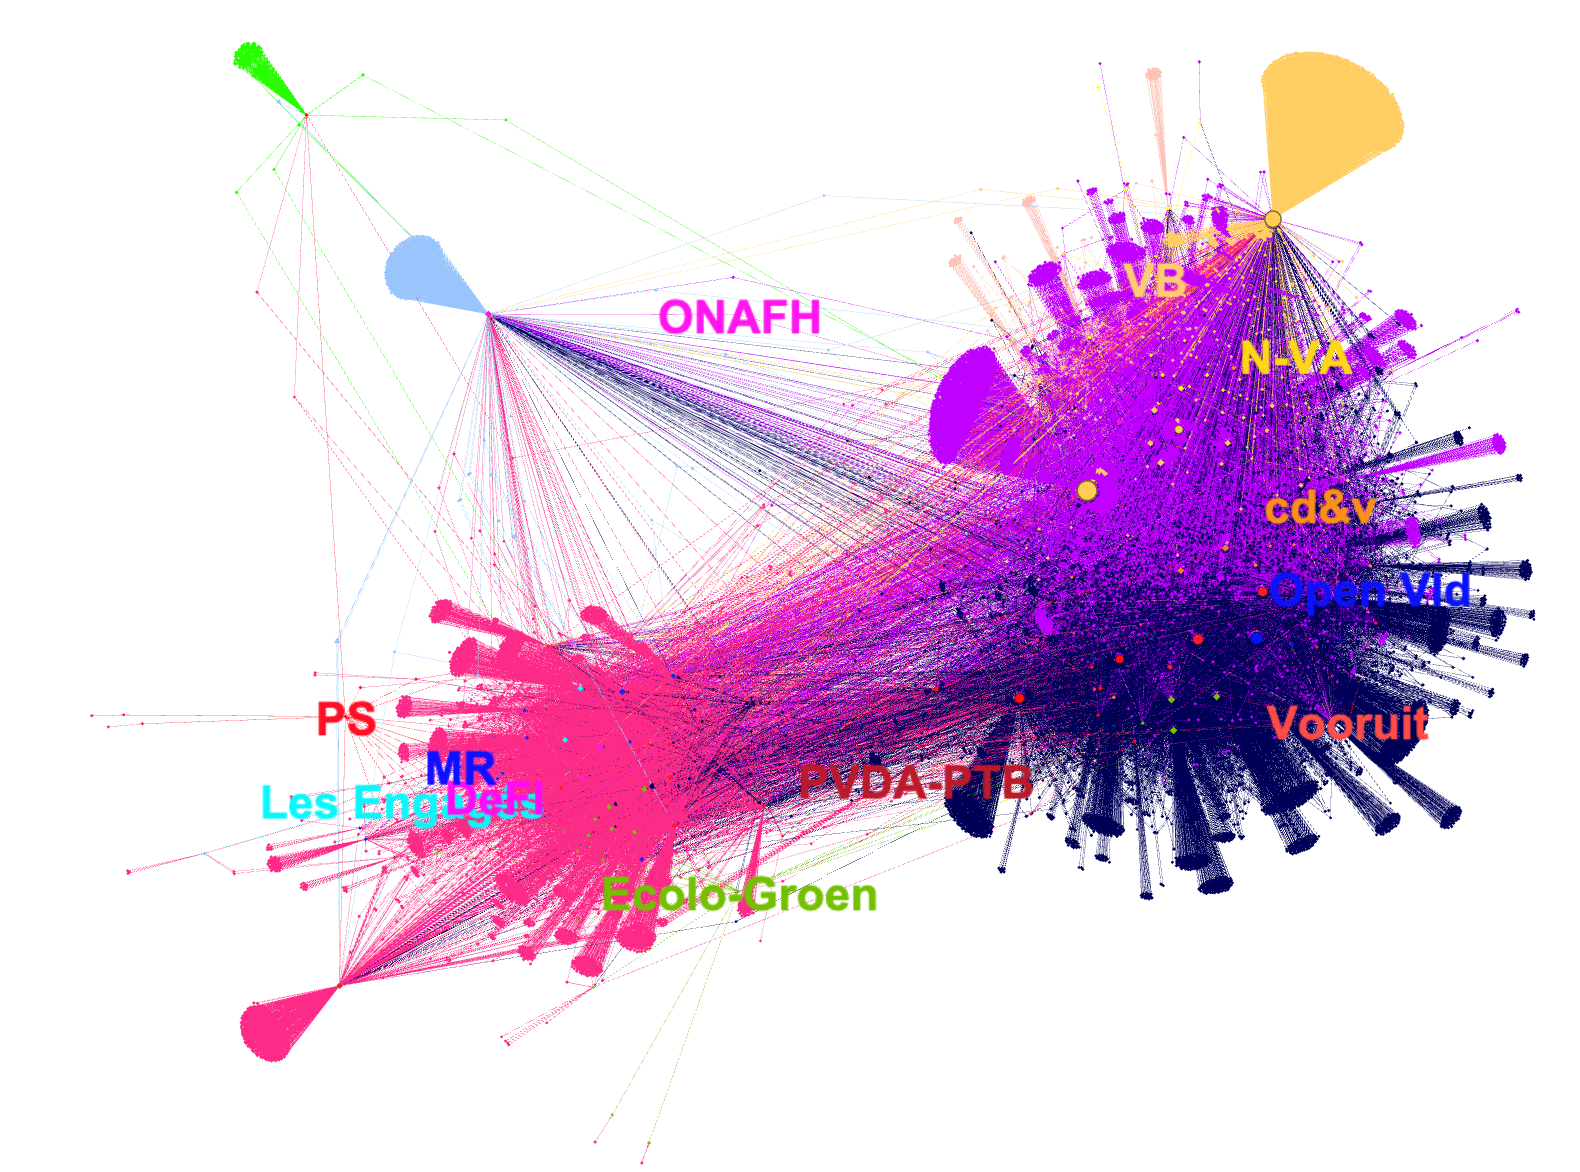

In [40]:
# Focus on the Flemish part
Image(filename='Community graph.png')

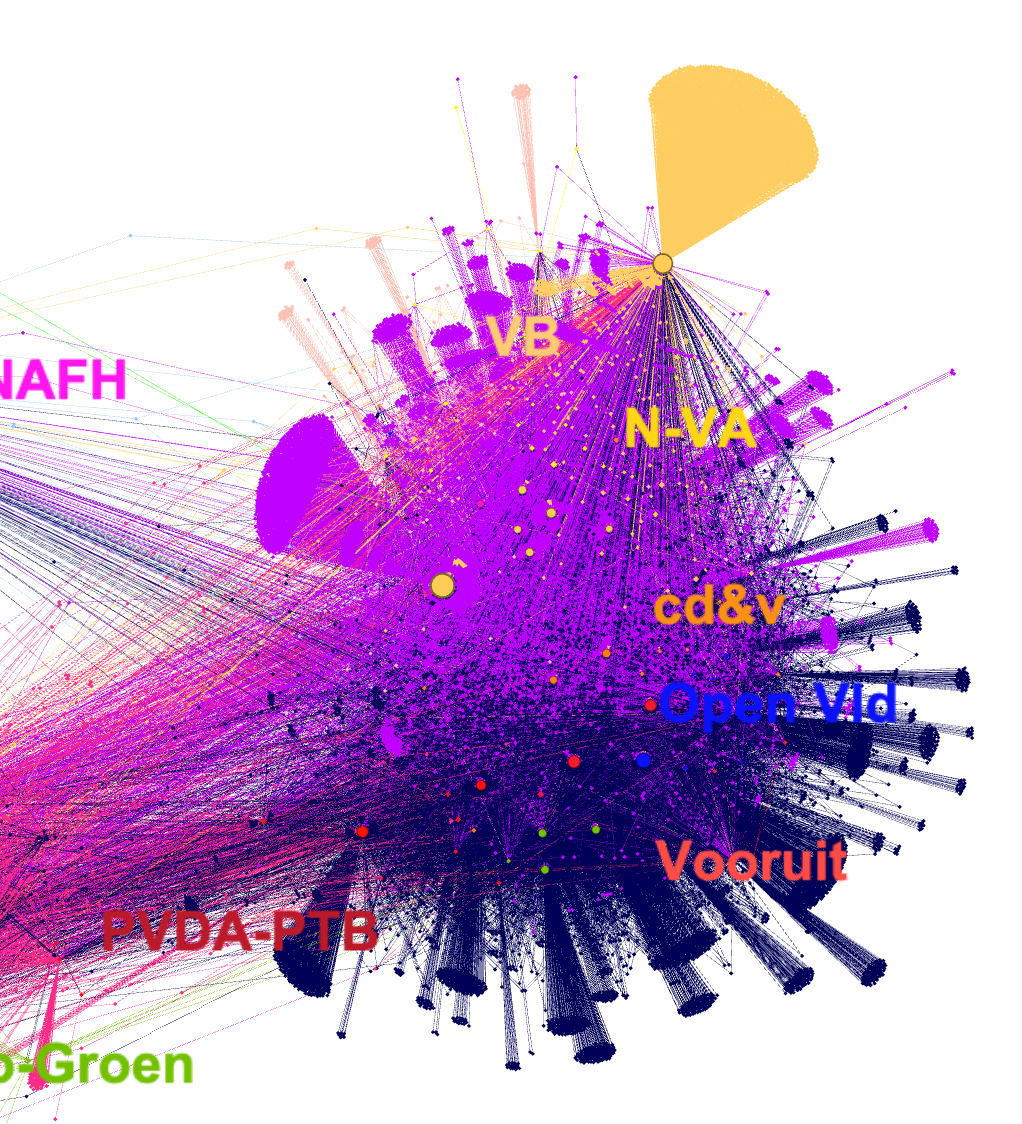

In [41]:
# Focus on Flanders
Image(filename='Zoom Flanders.png')

### Discussion of the graph:
- Now only includes direct interactions. 
- Flemish / Wallonian
- Right left wing
- More based on cultural than economic
- Discuss the communities
    Cd&V same community as N-VA and VB
- Woman in the top left SafaiDarya + print her tweet
    say a lot of international reaction
- Most interaction (based on size node) => Theo Francken and SafaiDarya (N-VA)